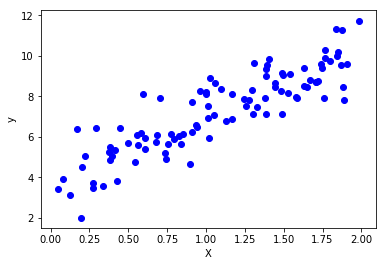

[[3.75994604]
 [3.25192093]]


In [22]:
"""
    Linear Regression model, and 2 very different
    ways to train it:
        1. Using a direct "closed-form" equation that directly comoputes the model 
        params that best fit the training set (i.e., the model params
        that minimize the cost function over the training set)
        2. Using an iterative optimization approach called Gradient Descent, that
        gradually tweaks the model params to minimize the cost function 
        over the training data, eventually converging to the same 
        set of params as the first method. We will look at a few varients of GD
        that we'll use again and agin when we study nn: Batch GD, Mini-Batch GD, 
        and Stochastic GD.
    
    On the other hand, Polynomial Regression, is a more complex model
    that can fit nonlinear datasets. 
    This model has more params than LN => its more prone to overfitting
    the data, so we'll look at how to detect whether or not 
    this is the case, using learning curves, and then we'll look at 
    several regularization techniques that can reduce the risk 
    of overfitting the training set. 
    
    Finally,two (more) models that are used in **classification
    tasks are Logistic regression and Softmax regression
    
    -----------------------------------------------------------------
    
    Linear regression: life_satisfaction = theta_0 + theta_1 * GDP_per_capita
    
    More generally, a linear model makes a prediction by simply computing 
    a weighted sum of the input features, plus a constant called the bias term
    (or intercept term)
    
    y' = theta_0 + theta_1_x_1 + theta_2_x_2 + ... _ theta_n_x_n
    such that:
        - y' ----> the predicted value
        - n -----> number of features***
        - x_i -----> is the ith feature value
        - theta_j ----> the jth model parameter (including the bias term theta_0
          and feature weights theta_1, ..., theta_n)
    
    This can be written in vectorized form as:
        y' = h_theta(x) = theta^T · x
    
    where:
        - theta ----> the model's param vector, containg the bias term theta_0 
            and the feature weights theta_1 to theta_n
        - theta_T -----> the transpose of theta 
        - x ----> the instance's feature vector, containing x_0 to x_n, with
            x_0 always equal to 1
        - theta_T · x -----> the dot product of theta_T and x
        - h_theta -----> is the hypothesis function, using the model params theta
     
    Recall that training a model means simply setting its params
    so that the model BEST FITS the training set. 
    Therefore, we need to measure the 'Bestness' by using a common
    performance measure of a regression model --> RMSE (Root Mean Square Error)
    
    So, to train a LR model, you need to find the value of theta that
    minimizes RMSE. In practice its simpler to minimize the MSE than RMSE
    , and it leads to same result because the value that minimizes a function
    minimizes its square root as well. 
    
    MSE cost function for a LR model:
    MSE(X, h_theta) = 1/m SUM(theta^T · x^(i) - y^(i))^2
    So instead of h we write h_theta to make it clear that 
    the model is parametrized by the vector theta. 
    
    How do we find the value of theta that minimizes the cost function?
    There is a closed-form solution -- in other words a math equation
    that gices the result directly. This is called the Normal Equation:
    
    theta' = (x ^ T · x)^-1 · y
        - theta' is the value of theta that minimizes the cost function
        - y is the vector of target values containing y^(1) to y^(m)
"""
import numpy as np
import matplotlib.pyplot as plt

# Randomly gen data set
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y, color="blue")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Now we compute the theta' using the normal equation; 
# We'll use the inv() function from NumPy's Linear Algebra module
# np.linalg, to compute the inverse of a matrix, 
# and the dot() method for matrix multiplication

# First add the bias to instances
X_b = np.c_[np.ones((100,1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


print(theta_best)

In [14]:
# Using theta_best to make predictions:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07997318],
       [9.86067293]])

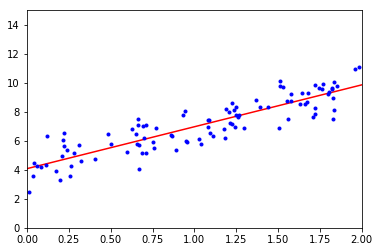

In [20]:
# Plot the models' preductions
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [23]:
# Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[0.86829385],
       [0.08048944]])